In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#import sklearn_relief as sr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 16})

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel("df_p.xlsx")

In [3]:
df = df.set_index(pd.DatetimeIndex(df['date']))

df = df.drop(['date'], axis=1)

In [4]:
df.head()

,SP500,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALLE,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,...,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1132.99,31.300001,4.77,40.380001,214.009998,NaN,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,NaN,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,...,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,NaN,34.160000,21.609949,54.230000,NaN,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,NaN,17.100000,35.090001,60.020000,13.33,NaN
2010-01-05,1136.52,30.960001,5.31,40.139999,214.379993,NaN,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,NaN,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,...,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,NaN,34.009998,21.879956,53.689999,NaN,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,NaN,17.230000,34.970000,61.919998,13.80,NaN
2010-01-06,1137.14,30.850001,5.09,40.490002,210.969995,NaN,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,NaN,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,...,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,NaN,34.000000,22.589952,53.570000,NaN,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,NaN,17.170000,34.720002,61.900002,15.00,NaN
2010-01-07,1141.69,30.809999,5.24,40.480000,210.580000,NaN,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,NaN,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,...,20.860001,33.009998,20.860001,65.809998,57.410000,34.080002,9.80,24.170000,70.489998,86.760002,47.340000,75.919998,30.200001,18.950005,5

In [5]:
sp500 = df.pop('SP500')

df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALLE,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,AWK,...,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,31.300001,4.77,40.380001,214.009998,NaN,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,NaN,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,22.650000,...,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,NaN,34.160000,21.609949,54.230000,NaN,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,NaN,17.100000,35.090001,60.020000,13.33,NaN
2010-01-05,30.960001,5.31,40.139999,214.379993,NaN,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,NaN,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,22.879999,...,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,NaN,34.009998,21.879956,53.689999,NaN,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,NaN,17.230000,34.970000,61.919998,13.80,NaN
2010-01-06,30.850001,5.09,40.490002,210.969995,NaN,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,NaN,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,23.000000,...,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,NaN,34.000000,22.589952,53.570000,NaN,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,NaN,17.170000,34.720002,61.900002,15.00,NaN
2010-01-07,30.809999,5.24,40.480000,210.580000,NaN,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,NaN,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,23.049999,...,20.860001,33.009998,20.860001,65.809998,57.410000,34.080002,9.80,24.170000,70.489998,86.760002,47.340000,75.919998,30.200001,18.95

In [6]:
df.dropna(axis=1, inplace=True)

df.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,...,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WM,WMB,WMT,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,31.300001,4.77,40.380001,214.009998,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,22.650000,40.919998,36.029999,...,28.080000,12.80,16.209999,31.150000,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,34.160000,21.609949,54.230000,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,17.100000,35.090001,60.020000,13.33
2010-01-05,30.960001,5.31,40.139999,214.379993,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,22.879999,40.830002,36.330002,...,28.920000,13.91,16.190001,30.900000,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,34.009998,21.879956,53.689999,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,17.230000,34.970000,61.919998,13.80
2010-01-06,30.850001,5.09,40.490002,210.969995,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,23.000000,41.490002,36.849998,...,29.559999,13.27,16.080000,30.750000,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,34.000000,22.589952,53.570000,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,17.170000,34.720002,61.900002,15.00
2010-01-07,30.809999,5.24,40.480000,210.580000,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,23.049999,41.980000,38.000000,...,29.209999,13.55,16.200001

In [7]:
df_features = df.copy()

In [8]:
df.insert(0, 'SP500', sp500)

df.dropna(axis=0, inplace=True)

In [9]:
df.head()

,SP500,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,...,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WM,WMB,WMT,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1132.99,31.300001,4.77,40.380001,214.009998,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,22.650000,40.919998,...,28.080000,12.80,16.209999,31.150000,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,34.160000,21.609949,54.230000,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,17.100000,35.090001,60.020000,13.33
2010-01-05,1136.52,30.960001,5.31,40.139999,214.379993,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,22.879999,40.830002,...,28.920000,13.91,16.190001,30.900000,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,34.009998,21.879956,53.689999,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,17.230000,34.970000,61.919998,13.80
2010-01-06,1137.14,30.850001,5.09,40.490002,210.969995,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,23.000000,41.490002,...,29.559999,13.27,16.080000,30.750000,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,34.000000,22.589952,53.570000,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,17.170000,34.720002,61.900002,15.00
2010-01-07,1141.69,30.809999,5.24,40.480000,210.580000,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,23.049999,41.980000,...,29.209999,13.55,16.200001,31.20

In [10]:
df_features.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,...,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WM,WMB,WMT,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,31.300001,4.77,40.380001,214.009998,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,22.650000,40.919998,36.029999,...,28.080000,12.80,16.209999,31.150000,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,34.160000,21.609949,54.230000,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,17.100000,35.090001,60.020000,13.33
2010-01-05,30.960001,5.31,40.139999,214.379993,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,22.879999,40.830002,36.330002,...,28.920000,13.91,16.190001,30.900000,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,34.009998,21.879956,53.689999,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,17.230000,34.970000,61.919998,13.80
2010-01-06,30.850001,5.09,40.490002,210.969995,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,23.000000,41.490002,36.849998,...,29.559999,13.27,16.080000,30.750000,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,34.000000,22.589952,53.570000,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,17.170000,34.720002,61.900002,15.00
2010-01-07,30.809999,5.24,40.480000,210.580000,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,23.049999,41.980000,38.000000,...,29.209999,13.55,16.200001

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SP500,1750.0,1645.664383,371.679435,1022.580000,1310.225000,1650.490000,2020.782500,2271.720000
A,1750.0,42.523560,7.575790,26.970000,37.402501,41.735001,46.437499,60.930000
AAL,1750.0,23.869497,15.552244,4.000000,9.320000,17.225000,39.349998,55.759998
AAP,1750.0,103.784171,43.457799,39.160000,66.459999,84.584999,148.100003,200.380005
AAPL,1750.0,312.406131,185.066262,90.279999,115.190002,318.014996,468.677509,702.100021
...,...,...,...,...,...,...,...,...
XRX,1750.0,9.988549,1.817580,6.230000,8.600000,9.935000,11.067500,14.320000
YHOO,1750.0,27.271411,11.393429,11.090000,15.920000,26.750000,37.357500,52.369999
YUM,1750.0,66.491321,14.201247,32.720001,54.570002,69.630004,75.197501,94.880005
ZBH,1750.0,82.886543,24.246245,46.970001,60.842500,79.549999,103.500000,133.089996


<ipython-input-12-3f35e1f319ff>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


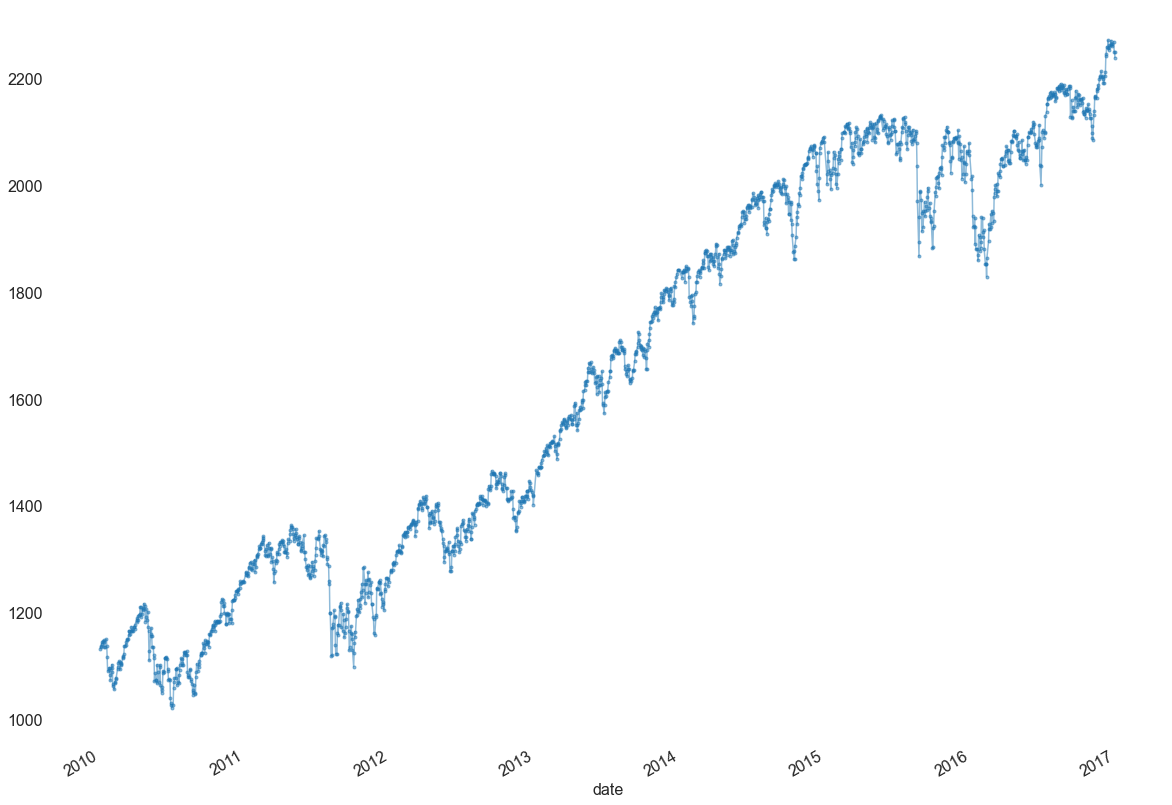

In [12]:
axes = df.loc[:, 'SP500'].plot(marker='.', alpha=0.5, linestyle='-', figsize=(20, 15), subplots=True)

ax = plt.axes()
ax.set_facecolor("white")

(Vamos a dejarlo de momento todo junto) Primero observamos el intervalo de tiempo a analizar y separamos el conjunto de train y test.

In [13]:
#df_features = df_features.drop(corr_features, axis=1)

#df_features.head()

In [14]:
#df = df.drop(corr_features, axis=1)

#df.head()

Importancia de Variables. Utilización de un regresor (Random Forest) para detectar importancias

In [15]:
df.iloc[:,0]

date
2010-01-04    1132.99
2010-01-05    1136.52
2010-01-06    1137.14
2010-01-07    1141.69
2010-01-08    1144.98
               ...   
2016-12-23    2263.79
2016-12-27    2268.88
2016-12-28    2249.92
2016-12-29    2249.26
2016-12-30    2238.83
Name: SP500, Length: 1750, dtype: float64

In [16]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

col_names = df_features.columns

X.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,...,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WM,WMB,WMT,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,31.300001,4.77,40.380001,214.009998,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,22.650000,40.919998,36.029999,...,28.080000,12.80,16.209999,31.150000,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,34.160000,21.609949,54.230000,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,17.100000,35.090001,60.020000,13.33
2010-01-05,30.960001,5.31,40.139999,214.379993,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,22.879999,40.830002,36.330002,...,28.920000,13.91,16.190001,30.900000,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,34.009998,21.879956,53.689999,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,17.230000,34.970000,61.919998,13.80
2010-01-06,30.850001,5.09,40.490002,210.969995,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,23.000000,41.490002,36.849998,...,29.559999,13.27,16.080000,30.750000,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,34.000000,22.589952,53.570000,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,17.170000,34.720002,61.900002,15.00
2010-01-07,30.809999,5.24,40.480000,210.580000,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,23.049999,41.980000,38.000000,...,29.209999,13.55,16.200001

In [17]:
X.tail()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,...,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WM,WMB,WMT,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-23,46.200001,48.480000,170.889999,116.519997,78.559998,38.419998,117.480003,105.019997,73.839996,45.150002,102.930000,233.639999,76.000000,52.450001,63.169998,11.73,125.949997,70.150002,199.080002,66.410004,44.740002,93.279999,52.009998,67.629997,88.820000,90.430000,74.580002,127.190002,32.900002,49.450001,143.979996,147.550003,111.930000,106.029999,760.590027,48.990002,146.020004,112.889999,66.400002,71.250000,146.479996,68.300003,19.780001,36.500000,174.490005,181.940002,71.430000,72.949997,74.970001,234.919998,...,29.290001,74.790001,35.570000,107.930000,256.859985,163.029999,44.470001,105.180000,115.970001,28.420000,108.059998,52.200001,110.650002,78.150002,91.010002,53.299999,35.150002,68.959999,125.589996,102.870003,82.110001,76.470001,74.309998,60.860001,53.680000,136.210007,84.279999,70.349998,58.730000,55.959999,31.910000,181.949997,70.919998,31.559999,69.540001,21.850000,30.570000,77.230003,88.339996,135.720001,40.669998,37.990002,60.560001,90.709999,59.240002,8.95,38.660000,63.810001,102.320000,43.860001
2016-12-27,46.509998,48.610001,171.839996,117.260002,78.820000,38.599998,117.550003,104.980003,74.309998,45.650002,103.309998,233.710007,75.980003,52.560001,63.130001,11.86,126.230003,70.400002,200.490005,66.699997,44.310001,93.739998,51.950001,68.089996,89.010002,90.540001,74.510002,126.059998,33.330002,49.709999,145.050003,148.360001,112.330002,106.290001,771.400024,49.549999,145.679993,112.500000,66.339996,71.540001,147.380005,68.339996,19.780001,36.529999,175.820007,182.309998,71.690002,73.080002,74.980003,235.589996,...,29.309999,74.669998,35.580002,107.169998,258.730011,162.639999,44.549999,105.709999,116.129997,28.639999,108.580002,52.310001,110.980003,78.349998,91.580002,53.779999,35.790001,69.449997,127.540001,103.000000,82.150002,76.750000,75.190002,61.529999,53.639999,136.509995,84.489998,70.169998,58.570000,55.950001,31.719999,183.649994,70.959999,31.780001,69.699997,22.030001,30.430000,77.120003,88.239998,136.710007,40.730000,38.029999,61.240002,90.750000,59.070000,8.94,38.919998,64.029999,103.139999,43.930000
2016-12-28,45.720001,47.669998,170.419998,116.760002,78.349998,38.220001,116.610001,103.769997,73.559998,45.340000,103.050003,228.570007,75.019997,51.820000,62.389999,11.64,124.580002,69.800003,204.059998,65.879997,44.230000,93.190002,51.619999,67.269997,86.580002,88.690002,74.349998,123.730003,32.900002,48.750000,143.669998,147.669998,110.820000,105.839996,772.130005,48.400002,144.259995,111.720001,64.589996,70.639999,145.119995,67.570000,19.250000,36.430000,173.940002,180.190002,70.790001,71.980003,74.370003,230.800003,...,29.420000,73.529999,35.490002,106.139999,255.750000,161.440002,43.959999,104.760002,115.199997,28.730000,106.209999,51.779999,110.190002,78.300003,90.650002,53.810001,35.520000,68.669998,126.849998,102.320000,81.650002,76.989998,74.589996,61.160000,53.439999,134.660004,83.589996,69.209999,57.900002,55.320000,31.219999,182.820007,70.959999,31.040001,69.309998,21.730000,29.889999,76.550003,87.080002,136.440002,40.290001,37.700001,60.630001,90.300003,58.150002,8.76,38.730000,63.720001,103.059998,43.279999
2016-12-29,45.639999,47.250000,170.279999,116.730003,79.339996,38.310001,117.010002,103.680000,73.580002,45.360001,103.449997,229.250000,74.980003,52.560001,63.279999,11.70,124.449997,69.830002,207.210007,65.500000,44.700001,92.669998,51.840000,67.040001,87.070000,88.529999,74.279999,123.629997,32.660000,48.660000,143.929993,147.779999,109.919998,106.389999

In [18]:
y.to_frame(name='SP500')

,SP500
date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
...,...
2016-12-23,2263.79
2016-12-27,2268.88
2016-12-28,2249.92


Dividimos el conjunto mediante la selección de fechas. Asi garantizamos el estudio de periodos de tiempo

In [19]:
def split_df(df):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    X_train = X['2010-01-04':'2014-12-31']
    X_test = X['2015-01-01':'2016-12-30']

    y_train = y['2010-01-04':'2014-12-31']
    y_test = y['2015-01-01':'2016-12-30']

    return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = split_df(df)

Establecemos un baseline con Linear Regression para comparara resultados

In [21]:
model = LinearRegression()

In [22]:
sc = StandardScaler()

In [23]:
#lr = LogisticRegression(solver='liblinear', penalty='l1', max_iter=5000, random_state = 1001)

In [24]:
#pipe_lr = Pipeline([('scaler', sc), ('lr', model)])

In [25]:
model.fit(X_train, y_train)

LinearRegression()

Resultados de Regresión Lineal utilizando el dataset en casi su totalidad (solo se han eliminado las caracteristicas que contenian NaN)

In [26]:
y_predict = model.predict(X_test)


MSLE_BL = mean_squared_log_error(y_test, y_predict)

MAE_BL = mean_absolute_error(y_test, y_predict)

print(f'mean_absolute_error: {MAE_BL}  mean_squared_log_error: {MSLE_BL}')

mean_absolute_error: 47.107168841096545  mean_squared_log_error: 0.0006253405533056656


### Random Forest

In [27]:
def feature_importances(model, col_names):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")

    for f in range(len(indices)):
        print("%d. %s (%f)" % (f + 1, col_names[indices[f]], importances[indices[f]]))
    
    return indices

In [28]:
model_RF = RandomForestRegressor(n_jobs=8, max_depth=9, n_estimators=200, random_state=1001)
model_RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=200, n_jobs=8,
                      random_state=1001)

In [29]:
indices = feature_importances(model_RF,col_names)

Feature ranking:
1. WFC (0.135111)
2. OMC (0.134736)
3. DIS (0.089881)
4. AMP (0.068087)
5. HON (0.043621)
6. VIAB (0.035657)
7. ADBE (0.035314)
8. IVZ (0.028186)
9. ECL (0.023731)
10. GPC (0.023702)
11. AXP (0.019855)
12. BLK (0.019803)
13. TWX (0.019768)
14. KMX (0.016214)
15. V (0.016048)
16. YHOO (0.015923)
17. COST (0.012111)
18. ADP (0.012028)
19. KR (0.011912)
20. BIIB (0.011892)
21. BA (0.011800)
22. AMG (0.011732)
23. BDX (0.010804)
24. ORCL (0.010191)
25. CVS (0.009935)
26. SNA (0.009915)
27. EXPE (0.009044)
28. MMM (0.008969)
29. MMC (0.008171)
30. PAYX (0.008105)
31. HRB (0.008014)
32. JNJ (0.007996)
33. UHS (0.007967)
34. PEP (0.007879)
35. FIS (0.006525)
36. LMT (0.004927)
37. AET (0.004907)
38. SCHW (0.004536)
39. UTX (0.004203)
40. CBS (0.004154)
41. ABC (0.004044)
42. NWL (0.004018)
43. EQT (0.004016)
44. WDC (0.004008)
45. HBI (0.004005)
46. SRCL (0.003985)
47. HSIC (0.003946)
48. NEE (0.003911)
49. FISV (0.002549)
50. R (0.002104)
51. PVH (0.001978)
52. CSX (0.001491

Se seleccionan las 24 caracteristicas mas importantes para comprobar mediante el baseline su resultado

In [30]:
col_Feat = col_names[indices[0:24]]

In [31]:
df_Feat = df_features[col_Feat]

df_Feat

,WFC,OMC,DIS,AMP,HON,VIAB,ADBE,IVZ,ECL,GPC,AXP,BLK,TWX,KMX,V,YHOO,COST,ADP,KR,BIIB,BA,AMG,BDX,ORCL
date,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.320000,39.619999,32.070000,39.880001,40.349998,29.980000,37.090000,23.340000,45.250000,38.130001,40.919998,238.580002,29.419995,23.980000,88.139999,17.100000,59.410000,42.830002,20.480000,53.639999,56.180000,68.879997,78.599998,24.850000
2010-01-05,28.070000,39.480000,31.990000,40.810001,40.430000,30.040001,37.700001,23.469999,44.560001,38.090000,40.830002,239.610001,29.089999,24.120001,87.129997,17.230000,59.230000,42.600003,20.240000,53.380001,58.020000,69.430000,77.870003,24.820000
2010-01-06,28.110001,39.169998,31.820000,41.380001,40.430000,29.889999,37.619999,22.980000,44.430000,38.020000,41.490002,234.669998,29.020003,24.430000,85.959999,17.170000,60.000000,42.500004,20.250000,53.430000,59.779999,70.790001,77.660004,24.459999
2010-01-07,29.129999,38.939999,31.830000,41.689999,41.209999,30.200001,36.889999,23.049999,44.910000,38.230000,41.980000,237.250000,28.719995,24.200001,86.760002,16.700001,59.709999,42.480000,20.450001,52.990002,62.200001,70.470001,77.639999,24.379999
2010-01-08,28.860001,39.389999,31.879999,41.840000,42.119999,30.040001,36.689999,22.920000,45.290001,38.240002,41.950001,238.919998,28.760005,24.309999,87.000000,16.700001,59.279999,42.420001,20.260000,54.080002,61.599998,69.820000,77.910004,24.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,55.959999,86.370003,105.150002,111.930000,116.989998,35.150002,105.019997,30.860001,118.760002,96.900002,74.970001,385.739990,96.410004,64.040001,78.150002,38.660000,162.080002,102.930000,35.080002,287.529999,157.809998,143.979996,166.479996,38.779999
2016-12-27,55.950001,86.849998,105.169998,112.330002,117.029999,35.790001,104.980003,31.160000,119.209999,97.580002,74.980003,387.489990,96.739998,64.309998,78.349998,38.919998,162.050003,103.309998,35.169998,291.119995,157.479996,145.050003,167.059998,38.820000
2016-12-28,55.320000,85.959999,104.300003,110.820000,115.750000,35.520000,103.769997,30.350000,118.000000,96.370003,74.370003,381.029999,96.220001,63.790001,78.300003,38.730000,161.009995,103.050003,34.680000,289.250000,156.100006,143.669998,165.869995,38.680000


Analisis de outliers de las variables selecionadas. Como se observa el conjunto presenta un porcentaje bajo de ourliers (solo KR presenta y están solo algo desplazados respecto al conjunto principal). El objetivo de este análisis es determinar si las variables selecionadas presentaban outliers para establecer procedimientos para su tratamiento, lo cual como se evidencia no es necesario.

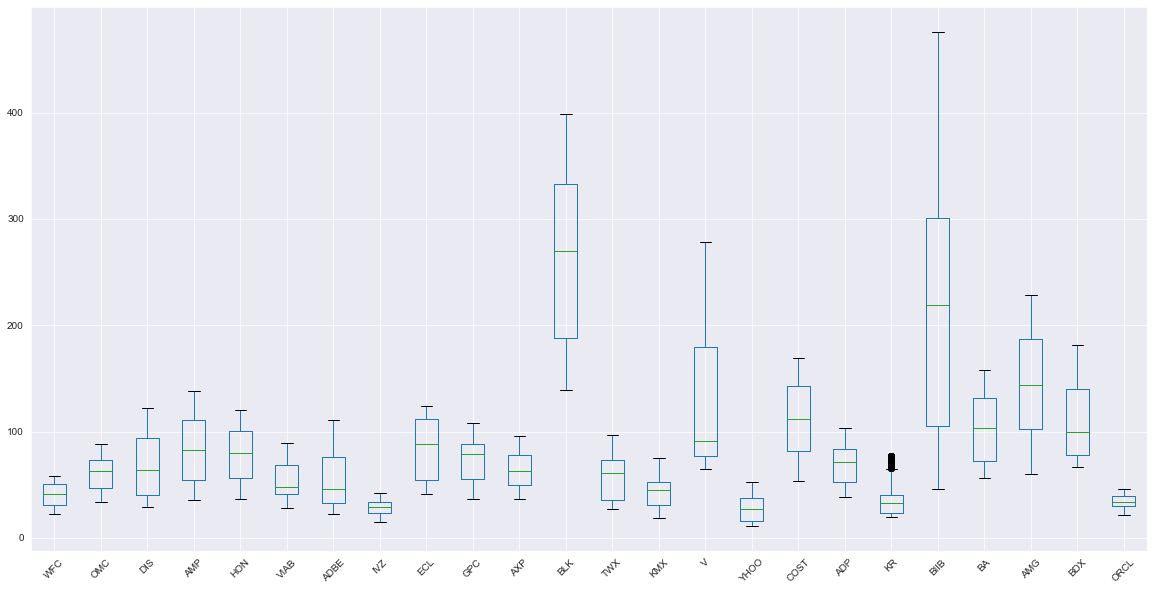

In [32]:
df_Feat.boxplot(rot=45, fontsize=10, figsize=(20,10))

In [33]:
df_Feat.insert(0, 'SP500', sp500)

df_Feat.dropna(axis=0, inplace=True)

df_Feat

<ipython-input-33-af9545672cc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Feat.dropna(axis=0, inplace=True)


,SP500,WFC,OMC,DIS,AMP,HON,VIAB,ADBE,IVZ,ECL,GPC,AXP,BLK,TWX,KMX,V,YHOO,COST,ADP,KR,BIIB,BA,AMG,BDX,ORCL
date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1132.99,27.320000,39.619999,32.070000,39.880001,40.349998,29.980000,37.090000,23.340000,45.250000,38.130001,40.919998,238.580002,29.419995,23.980000,88.139999,17.100000,59.410000,42.830002,20.480000,53.639999,56.180000,68.879997,78.599998,24.850000
2010-01-05,1136.52,28.070000,39.480000,31.990000,40.810001,40.430000,30.040001,37.700001,23.469999,44.560001,38.090000,40.830002,239.610001,29.089999,24.120001,87.129997,17.230000,59.230000,42.600003,20.240000,53.380001,58.020000,69.430000,77.870003,24.820000
2010-01-06,1137.14,28.110001,39.169998,31.820000,41.380001,40.430000,29.889999,37.619999,22.980000,44.430000,38.020000,41.490002,234.669998,29.020003,24.430000,85.959999,17.170000,60.000000,42.500004,20.250000,53.430000,59.779999,70.790001,77.660004,24.459999
2010-01-07,1141.69,29.129999,38.939999,31.830000,41.689999,41.209999,30.200001,36.889999,23.049999,44.910000,38.230000,41.980000,237.250000,28.719995,24.200001,86.760002,16.700001,59.709999,42.480000,20.450001,52.990002,62.200001,70.470001,77.639999,24.379999
2010-01-08,1144.98,28.860001,39.389999,31.879999,41.840000,42.119999,30.040001,36.689999,22.920000,45.290001,38.240002,41.950001,238.919998,28.760005,24.309999,87.000000,16.700001,59.279999,42.420001,20.260000,54.080002,61.599998,69.820000,77.910004,24.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,2263.79,55.959999,86.370003,105.150002,111.930000,116.989998,35.150002,105.019997,30.860001,118.760002,96.900002,74.970001,385.739990,96.410004,64.040001,78.150002,38.660000,162.080002,102.930000,35.080002,287.529999,157.809998,143.979996,166.479996,38.779999
2016-12-27,2268.88,55.950001,86.849998,105.169998,112.330002,117.029999,35.790001,104.980003,31.160000,119.209999,97.580002,74.980003,387.489990,96.739998,64.309998,78.349998,38.919998,162.050003,103.309998,35.169998,291.119995,157.479996,145.050003,167.059998,38.820000
2016-12-28,2249.92,55.320000,85.959999,104.300003,110.820000,115.750000,35.520000,103.769997,30.350000,118.000000,96.370003,74.370003,381.029999,96.220001,63.790001,78.300003,38.730000,161.009995,103.050003,34.680000,289.250000,156.100006,143.669998,165.869995,38.680000


In [34]:
features_from_FI = df_Feat.columns

features_from_FI

Index(['SP500', 'WFC', 'OMC', 'DIS', 'AMP', 'HON', 'VIAB', 'ADBE', 'IVZ',
       'ECL', 'GPC', 'AXP', 'BLK', 'TWX', 'KMX', 'V', 'YHOO', 'COST', 'ADP',
       'KR', 'BIIB', 'BA', 'AMG', 'BDX', 'ORCL'],
      dtype='object')

In [35]:
X_trainFI, X_testFI, y_trainFI, y_testFI = split_df(df_Feat)

In [36]:
model.fit(X_trainFI, y_trainFI)

LinearRegression()

In [37]:
y_predictFI = model.predict(X_testFI)

MSLE_RR = mean_squared_log_error(y_test, y_predictFI)

MAE_RR = mean_absolute_error(y_test, y_predictFI)

print(f'mean_absolute_error: {MAE_RR}  mean_squared_log_error: {MSLE_RR}')

mean_absolute_error: 85.66525059048766  mean_squared_log_error: 0.00292536760020241


### Implementación de PCA

In [38]:

sc = StandardScaler()
X_train_SC = sc.fit_transform(X_train)
X_test_SC = sc.transform(X_test)

In [39]:
pca = PCA(n_components=20, svd_solver='full', random_state=1001)
X_train_PCA = pca.fit_transform(X_train_SC)
X_test_PCA = pca.transform(X_test_SC)

In [40]:
explained_variance = pca.explained_variance_ratio_


<ipython-input-41-2bd76cbb616d>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


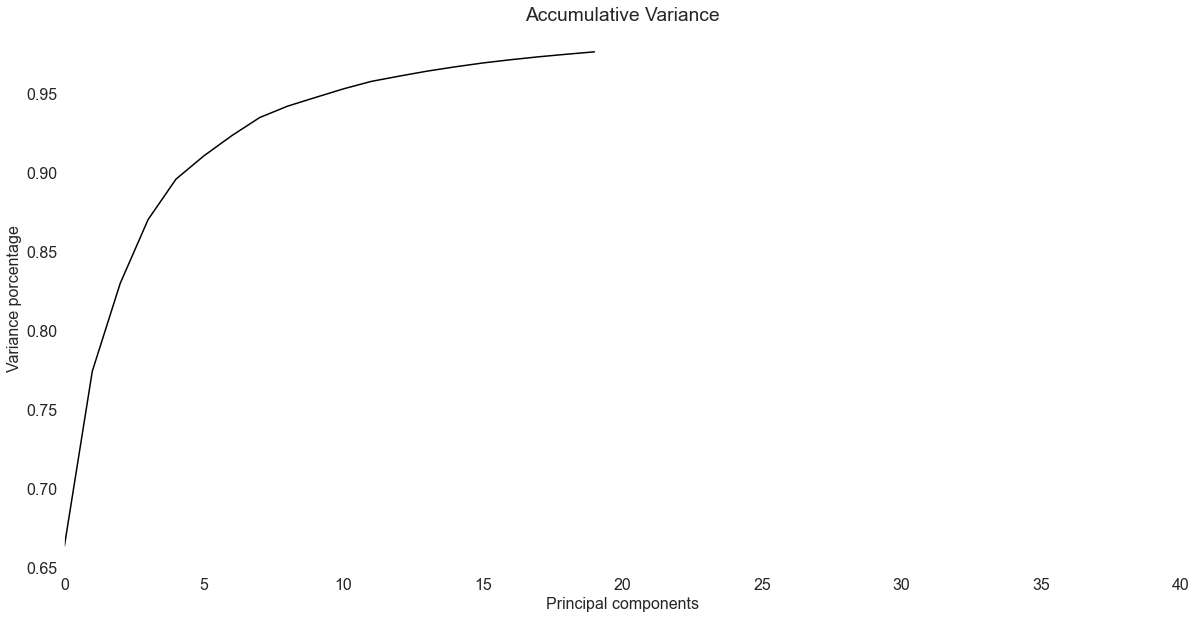

In [41]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.xlim(0,40)

ax = plt.axes()
ax.set_facecolor("white")

plt.plot(pca.explained_variance_ratio_.cumsum(), color = 'black')
plt.title("Accumulative Variance")
plt.xlabel("Principal components")
plt.ylabel("Variance porcentage")

plt.show()

Mediante el analisis de Elbow podemos observar que con 5 componentes es suficiente para predecir el conjunto. con las 5 primeras componentes se puede explicar el 89 % del conjunto

In [42]:
for j in range(20):
    print(pca.explained_variance_ratio_[j])

0.6636939864907925
0.11070390173832537
0.05561844259893261
0.04041914842359004
0.0256148323174424
0.014733673926309103
0.012801317905777033
0.011471934560673303
0.007212014773695771
0.0055076035800051765
0.0054310371763742205
0.004731203291179252
0.0033381895973094255
0.003151625301819961
0.0027256733651928895
0.0024612196999875685
0.002064582993322635
0.0018426577047092657
0.0016259286965251032
0.0015175552920748889


In [43]:
loadings = pca.components_
num_pc = pca.n_features_

In [44]:
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

In [45]:
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_features.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
variable,,,,,,,,,,,,,,,,,,,,
A,0.047209,-0.009615,0.057358,-0.067577,0.037239,0.017466,-0.051364,-0.068721,-0.005229,0.000875,0.028210,0.062924,0.007766,0.077484,-0.025694,-0.057044,0.010129,-0.050056,0.094664,0.096572
AAL,0.052591,-0.031601,-0.008026,0.050919,-0.001732,-0.022416,0.025060,-0.056079,-0.013626,0.008190,-0.035773,0.006013,-0.011672,0.011079,0.025213,0.021140,-0.011101,0.004239,-0.001052,0.011712
AAP,0.053293,-0.005075,0.024292,0.052102,0.008982,-0.049719,0.005093,-0.030071,0.005764,-0.065327,-0.020141,-0.001239,-0.025073,-0.007408,-0.010764,-0.002964,0.010802,0.075333,0.008496,-0.024910
AAPL,-0.001518,0.097775,0.001348,-0.088591,0.046465,-0.090869,-0.087392,-0.091983,-0.089674,0.085410,-0.111223,-0.039094,0.080545,-0.054230,0.109058,0.043889,-0.018042,0.072071,0.010305,-0.011882
ABC,0.055360,-0.009676,0.002953,0.021925,0.018165,0.009280,0.037770,0.044000,-0.032001,-0.021025,0.009091,0.016881,-0.029498,-0.003902,0.006592,-0.022202,-0.016620,0.003397,-0.015413,0.011192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.034969,-0.100202,0.031686,0.011218,-0.022411,-0.036963,0.012411,0.049234,0.012542,0.001841,0.015693,-0.031977,0.018053,0.064011,-0.000025,-0.064766,-0.027361,-0.046829,0.060325,0.026691
YHOO,0.053395,-0.029350,-0.021786,0.022521,0.022835,-0.015833,0.013450,0.045727,-0.053470,-0.049082,-0.022263,-0.018100,-0.043430,-0.007935,0.006230,-0.019705,0.004946,0.014157,0.008882,0.006485
YUM,0.048075,0.062999,0.020238,-0.011791,0.004788,-0.044948,-0.021430,-0.038050,0.029743,0.008347,0.011354,0.013184,0.058633,-0.004076,0.035853,0.024174,0.002187,0.074578,0.045142,0.006298


A continuación obtenemos las caracteristicas que aportan al conjunto de las 5 componentes

In [46]:
loadings_df_redux = loadings_df.iloc[:, 0:5]

loadings_df_redux

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
A,0.047209,-0.009615,0.057358,-0.067577,0.037239
AAL,0.052591,-0.031601,-0.008026,0.050919,-0.001732
AAP,0.053293,-0.005075,0.024292,0.052102,0.008982
AAPL,-0.001518,0.097775,0.001348,-0.088591,0.046465
ABC,0.055360,-0.009676,0.002953,0.021925,0.018165
...,...,...,...,...,...
XRX,0.034969,-0.100202,0.031686,0.011218,-0.022411
YHOO,0.053395,-0.029350,-0.021786,0.022521,0.022835
YUM,0.048075,0.062999,0.020238,-0.011791,0.004788


In [47]:
loadings_df_redux.nlargest(5, 'PC3').iloc[:,:]

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
CAT,0.028245,0.022736,0.153523,-0.020740,-0.033244
OKE,0.003955,0.011189,0.150261,0.014665,0.116452
CHRW,-0.009373,-0.037217,0.146342,0.013228,-0.086931
EXPD,-0.001488,-0.052814,0.143512,-0.066326,-0.044775
FMC,-0.005350,-0.002629,0.137599,-0.058995,0.088907


In [48]:
loadings_df_redux.sort_values(by=['PC3'],ascending=False).iloc[:,2].head()

variable
CAT     0.153523
OKE     0.150261
CHRW    0.146342
EXPD    0.143512
FMC     0.137599
Name: PC3, dtype: float64

In [49]:
col_PCA = pd.DataFrame()

for col in loadings_df_redux.columns:
    new_PCA = loadings_df_redux.sort_values(by=[col],ascending=False).iloc[:,0].head()

    col_PCA = col_PCA.append(new_PCA, ignore_index=True)

col_PCA

,HON,HSIC,MMC,PPG,SNA,IBM,ISRG,TDC,TSCO,WFM,CAT,CHRW,EXPD,FMC,OKE,ETR,EW,INTC,MNST,NKE,ALK,DLTR,TJX,UAA
0,0.056487,0.05639,0.05629,0.056343,0.056387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.028814,0.021405,0.003362,0.015194,-0.004389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028245,-0.009373,-0.001488,-0.00535,0.003955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000308,0.015007,0.041077,0.023179,-0.007443,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003955,NaN,NaN,NaN,NaN,NaN,0.025195,-0.00838,0.035297,0.022731


In [50]:
df_PCA = df_features[col_PCA.columns]

df_PCA

,HON,HSIC,MMC,PPG,SNA,IBM,ISRG,TDC,TSCO,WFM,CAT,CHRW,EXPD,FMC,OKE,ETR,EW,INTC,MNST,NKE,ALK,DLTR,TJX,UAA
date,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,40.349998,53.430000,21.870001,60.599998,42.860001,132.449997,308.769989,30.870001,53.340000,27.850000,58.549999,59.340000,35.080002,56.820000,45.579999,82.150002,87.470001,20.879999,39.280000,65.349998,34.869999,48.170002,36.040001,28.080000
2010-01-05,40.430000,53.279999,21.340000,60.639999,42.840000,130.850006,307.380005,30.990000,52.779999,27.620001,59.250000,58.110001,35.320000,56.630001,45.180000,80.839996,88.099998,20.870001,39.430000,65.610001,36.779999,47.560000,37.009998,28.920000
2010-01-06,40.430000,53.450001,21.990000,61.590000,43.080002,130.000000,311.839996,30.650000,52.669998,27.940001,59.430000,57.340000,34.500000,57.180000,45.440000,81.250000,89.070000,20.799999,40.250001,65.209999,36.450001,50.349998,37.160000,29.559999
2010-01-07,41.209999,53.639999,22.270000,61.869999,43.799999,129.550003,310.670013,30.299999,53.389999,27.820000,59.669998,56.790001,34.290001,56.470001,45.140001,80.279999,89.879997,20.600000,40.090001,65.849998,36.259998,50.020002,39.060001,29.209999
2010-01-08,42.119999,53.959999,22.160000,61.750000,44.709999,130.850006,308.959991,30.790001,53.360001,27.959999,60.340000,57.549999,34.650002,55.970001,45.400001,79.510002,89.480003,20.830000,40.290001,65.720001,35.540001,49.329998,38.549999,29.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,116.989998,152.789993,68.519997,94.690002,173.410004,166.710007,640.750000,26.969999,76.129997,31.910000,94.320000,74.540001,53.700001,56.689999,58.689999,72.889999,93.000000,36.970001,45.570000,51.910000,90.430000,78.699997,76.440002,29.290001
2016-12-27,117.029999,153.210007,68.199997,95.849998,173.979996,167.139999,639.510010,27.330000,76.529999,31.719999,94.550003,74.480003,53.759998,57.320000,59.029999,73.010002,93.349998,37.070000,45.529999,51.290001,90.540001,78.120003,76.250000,29.309999
2016-12-28,115.750000,152.250000,67.720001,94.669998,171.740005,166.190002,635.549988,27.090000,75.730003,31.219999,93.150002,73.470001,53.110001,56.660000,57.669998,71.989998,92.709999,36.630001,44.910000,51.020000,88.690002,77.669998,75.309998,29.420000


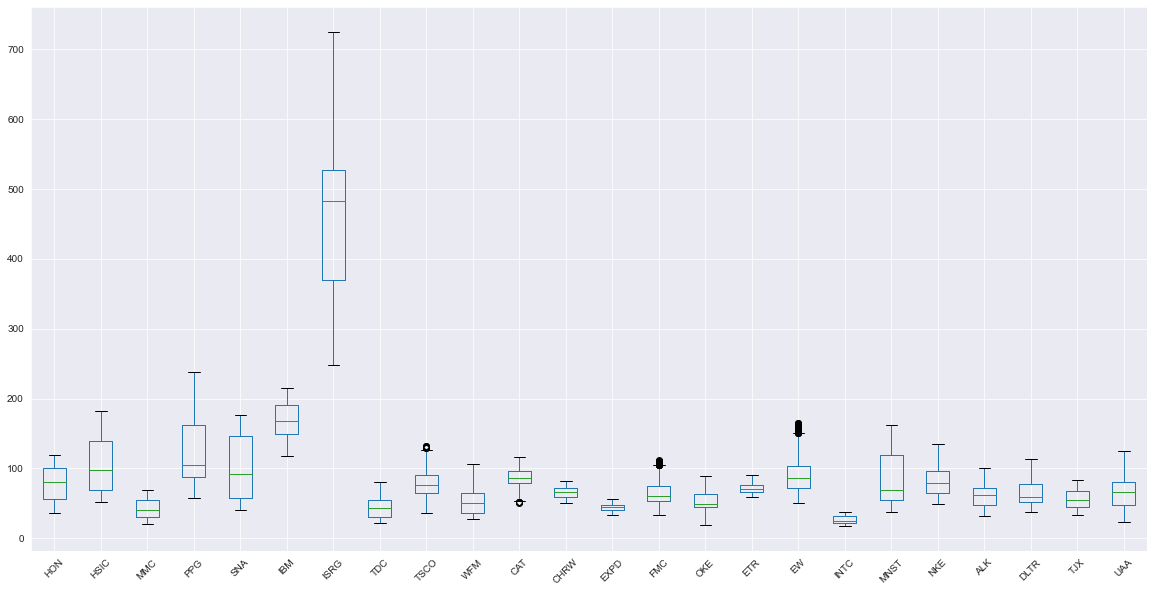

In [51]:
df_PCA.boxplot(rot=45, fontsize=10, figsize=(20,10))

In [52]:
features_from_PCA = df_PCA.columns

features_from_PCA

Index(['HON', 'HSIC', 'MMC', 'PPG', 'SNA', 'IBM', 'ISRG', 'TDC', 'TSCO', 'WFM',
       'CAT', 'CHRW', 'EXPD', 'FMC', 'OKE', 'ETR', 'EW', 'INTC', 'MNST', 'NKE',
       'ALK', 'DLTR', 'TJX', 'UAA'],
      dtype='object')

In [53]:
df_PCA.insert(0, 'SP500', sp500)

df_PCA.dropna(axis=0, inplace=True)

df_PCA

<ipython-input-53-390db95c9911>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PCA.dropna(axis=0, inplace=True)


,SP500,HON,HSIC,MMC,PPG,SNA,IBM,ISRG,TDC,TSCO,WFM,CAT,CHRW,EXPD,FMC,OKE,ETR,EW,INTC,MNST,NKE,ALK,DLTR,TJX,UAA
date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1132.99,40.349998,53.430000,21.870001,60.599998,42.860001,132.449997,308.769989,30.870001,53.340000,27.850000,58.549999,59.340000,35.080002,56.820000,45.579999,82.150002,87.470001,20.879999,39.280000,65.349998,34.869999,48.170002,36.040001,28.080000
2010-01-05,1136.52,40.430000,53.279999,21.340000,60.639999,42.840000,130.850006,307.380005,30.990000,52.779999,27.620001,59.250000,58.110001,35.320000,56.630001,45.180000,80.839996,88.099998,20.870001,39.430000,65.610001,36.779999,47.560000,37.009998,28.920000
2010-01-06,1137.14,40.430000,53.450001,21.990000,61.590000,43.080002,130.000000,311.839996,30.650000,52.669998,27.940001,59.430000,57.340000,34.500000,57.180000,45.440000,81.250000,89.070000,20.799999,40.250001,65.209999,36.450001,50.349998,37.160000,29.559999
2010-01-07,1141.69,41.209999,53.639999,22.270000,61.869999,43.799999,129.550003,310.670013,30.299999,53.389999,27.820000,59.669998,56.790001,34.290001,56.470001,45.140001,80.279999,89.879997,20.600000,40.090001,65.849998,36.259998,50.020002,39.060001,29.209999
2010-01-08,1144.98,42.119999,53.959999,22.160000,61.750000,44.709999,130.850006,308.959991,30.790001,53.360001,27.959999,60.340000,57.549999,34.650002,55.970001,45.400001,79.510002,89.480003,20.830000,40.290001,65.720001,35.540001,49.329998,38.549999,29.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,2263.79,116.989998,152.789993,68.519997,94.690002,173.410004,166.710007,640.750000,26.969999,76.129997,31.910000,94.320000,74.540001,53.700001,56.689999,58.689999,72.889999,93.000000,36.970001,45.570000,51.910000,90.430000,78.699997,76.440002,29.290001
2016-12-27,2268.88,117.029999,153.210007,68.199997,95.849998,173.979996,167.139999,639.510010,27.330000,76.529999,31.719999,94.550003,74.480003,53.759998,57.320000,59.029999,73.010002,93.349998,37.070000,45.529999,51.290001,90.540001,78.120003,76.250000,29.309999
2016-12-28,2249.92,115.750000,152.250000,67.720001,94.669998,171.740005,166.190002,635.549988,27.090000,75.730003,31.219999,93.150002,73.470001,53.110001,56.660000,57.669998,71.989998,92.709999,36.630001,44.910000,51.020000,88.690002,77.669998,75.309998,29.420000


In [54]:
X_trainPCA, X_testPCA, y_trainPCA, y_testPCA = split_df(df_PCA)

In [55]:
model.fit(X_trainPCA, y_trainPCA)

LinearRegression()

In [56]:
y_predictPCA = model.predict(X_testPCA)

MSLE_PCA = mean_squared_log_error(y_test, y_predictPCA)

MAE_PCA = mean_absolute_error(y_test, y_predictPCA)

print(f'mean_absolute_error: {MAE_PCA}  mean_squared_log_error: {MSLE_PCA}')

mean_absolute_error: 128.13308155081293  mean_squared_log_error: 0.004752200095130408


### Lasso

In [57]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [58]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 3, scoring="neg_mean_squared_error",verbose=3
                      )

In [59]:
search.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 99 candidates, totalling 297 fits
[CV] model__alpha=0.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44230.863297258686, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56697.234006175684, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................. model__alpha=0.1, score=-682.792, total=   0.2s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-9662.644, total=   0.1s
[CV] model__alpha=0.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7473.072327505421, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16703.16827510587, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=0.1, score=-1193.783, total=   0.2s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-175.346, total=   0.1s
[CV] model__alpha=0.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32504.93403785096, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4470.107281121042, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=0.2, score=-1916.800, total=   0.1s
[CV] model__alpha=0.2 ................................................
[CV] ................ model__alpha=0.2, score=-4018.814, total=   0.1s
[CV] model__alpha=0.30000000000000004 ................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12863.236401011663, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28812.67724777962, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=0.30000000000000004, score=-434.666, total=   0.2s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-1049.897, total=   0.1s
[CV] model__alpha=0.30000000000000004 ................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4098.0808586419535, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11408.334707314132, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=0.30000000000000004, score=-6722.230, total=   0.1s
[CV] model__alpha=0.4 ................................................
[CV] ................. model__alpha=0.4, score=-962.235, total=   0.1s
[CV] model__alpha=0.4 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29351.500877877217, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4047.6562032982765, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=0.4, score=-516.351, total=   0.1s
[CV] model__alpha=0.4 ................................................
[CV] ............... model__alpha=0.4, score=-10617.310, total=   0.2s
[CV] model__alpha=0.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10615.954516420541, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28382.742718222085, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=0.5, score=-1548.590, total=   0.1s
[CV] model__alpha=0.5 ................................................
[CV] ................. model__alpha=0.5, score=-423.824, total=   0.1s
[CV] model__alpha=0.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4682.641699012231, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12050.172070334282, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=0.5, score=-14745.843, total=   0.1s
[CV] model__alpha=0.6 ................................................
[CV] ................ model__alpha=0.6, score=-2348.471, total=   0.2s
[CV] model__alpha=0.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28452.311797674764, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4996.8525900893455, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=0.6, score=-367.185, total=   0.1s
[CV] model__alpha=0.6 ................................................
[CV] ............... model__alpha=0.6, score=-17946.916, total=   0.1s
[CV] model__alpha=0.7000000000000001 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13604.58856596313, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28176.331025059277, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=0.7000000000000001, score=-3027.716, total=   0.1s
[CV] model__alpha=0.7000000000000001 .................................
[CV] .. model__alpha=0.7000000000000001, score=-344.095, total=   0.1s
[CV] model__alpha=0.7000000000000001 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5425.788316954862, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14347.793713322346, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=0.7000000000000001, score=-21286.643, total=   0.3s
[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-3678.191, total=   0.1s
[CV] model__alpha=0.8 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29015.45139098762, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4924.801319286764, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=0.8, score=-323.051, total=   0.1s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-21917.315, total=   0.1s
[CV] model__alpha=0.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15910.613254241107, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29709.669002568953, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=0.9, score=-4263.477, total=   0.2s
[CV] model__alpha=0.9 ................................................
[CV] ................. model__alpha=0.9, score=-324.238, total=   0.2s
[CV] model__alpha=0.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4398.574265668725, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14274.202511295958, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=0.9, score=-24391.492, total=   0.1s
[CV] model__alpha=1.0 ................................................
[CV] ................ model__alpha=1.0, score=-4666.023, total=   0.1s
[CV] model__alpha=1.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29549.81884904007, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3449.9449555944193, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=1.0, score=-339.486, total=   0.1s
[CV] model__alpha=1.0 ................................................
[CV] ............... model__alpha=1.0, score=-25568.061, total=   0.1s
[CV] model__alpha=1.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13449.104116670722, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29747.466240119982, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=1.1, score=-4947.084, total=   0.1s
[CV] model__alpha=1.1 ................................................
[CV] ................. model__alpha=1.1, score=-344.303, total=   0.1s
[CV] model__alpha=1.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3198.372417750983, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13027.026904442966, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=1.1, score=-25950.897, total=   0.1s
[CV] model__alpha=1.2000000000000002 .................................
[CV] . model__alpha=1.2000000000000002, score=-5221.229, total=   0.2s
[CV] model__alpha=1.2000000000000002 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30712.495369697528, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3442.419668144006, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=1.2000000000000002, score=-331.803, total=   0.1s
[CV] model__alpha=1.2000000000000002 .................................
[CV]  model__alpha=1.2000000000000002, score=-25560.832, total=   0.1s
[CV] model__alpha=1.3000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13326.469460061162, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29480.13145154485, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=1.3000000000000003, score=-5480.375, total=   0.1s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-275.640, total=   0.1s
[CV] model__alpha=1.3000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3527.838320214354, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14176.96636718708, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=1.3000000000000003, score=-24875.417, total=   0.1s
[CV] model__alpha=1.4000000000000001 .................................
[CV] . model__alpha=1.4000000000000001, score=-5759.642, total=   0.1s
[CV] model__alpha=1.4000000000000001 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29052.15132990313, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3651.756717408376, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=1.4000000000000001, score=-243.734, total=   0.1s
[CV] model__alpha=1.4000000000000001 .................................
[CV]  model__alpha=1.4000000000000001, score=-24576.309, total=   0.1s
[CV] model__alpha=1.5000000000000002 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14906.148348412786, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28848.233456796315, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=1.5000000000000002, score=-6022.647, total=   0.1s
[CV] model__alpha=1.5000000000000002 .................................
[CV] .. model__alpha=1.5000000000000002, score=-222.598, total=   0.1s
[CV] model__alpha=1.5000000000000002 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3773.2198149734104, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=1.5000000000000002, score=-24499.202, total=   0.1s
[CV] model__alpha=1.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15852.753039418683, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28488.76368108491, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=1.6, score=-6328.682, total=   0.3s
[CV] model__alpha=1.6 ................................................
[CV] ................. model__alpha=1.6, score=-204.808, total=   0.1s
[CV] model__alpha=1.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3928.8870640750556, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15932.217692442944, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=1.6, score=-24421.824, total=   0.1s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-6681.251, total=   0.1s
[CV] model__alpha=1.7000000000000002 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28798.63012602627, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3997.7607841193585, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=1.7000000000000002, score=-190.270, total=   0.1s
[CV] model__alpha=1.7000000000000002 .................................
[CV]  model__alpha=1.7000000000000002, score=-24172.962, total=   0.1s
[CV] model__alpha=1.8000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16431.026430449663, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28296.06796436396, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=1.8000000000000003, score=-6986.855, total=   0.1s
[CV] model__alpha=1.8000000000000003 .................................
[CV] .. model__alpha=1.8000000000000003, score=-180.070, total=   0.1s
[CV] model__alpha=1.8000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4043.8326321377062, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16315.274931946551, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=1.8000000000000003, score=-23825.860, total=   0.1s
[CV] model__alpha=1.9000000000000001 .................................
[CV] . model__alpha=1.9000000000000001, score=-7159.970, total=   0.1s
[CV] model__alpha=1.9000000000000001 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27398.18282741734, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4082.3653961641576, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=1.9000000000000001, score=-163.626, total=   0.1s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-23455.314, total=   0.1s
[CV] model__alpha=2.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16130.463760784376, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27922.688054077094, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=2.0, score=-7284.949, total=   0.1s
[CV] model__alpha=2.0 ................................................
[CV] ................. model__alpha=2.0, score=-149.982, total=   0.1s
[CV] model__alpha=2.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4078.799737892623, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16796.318549456126, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=2.0, score=-23083.327, total=   0.1s
[CV] model__alpha=2.1 ................................................
[CV] ................ model__alpha=2.1, score=-6982.612, total=   0.1s
[CV] model__alpha=2.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29587.662342268086, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3945.443895654753, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=2.1, score=-137.256, total=   0.1s
[CV] model__alpha=2.1 ................................................
[CV] ............... model__alpha=2.1, score=-22764.653, total=   0.1s
[CV] model__alpha=2.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16165.957699961338, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30882.80298074631, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=2.2, score=-6744.944, total=   0.1s
[CV] model__alpha=2.2 ................................................
[CV] ................. model__alpha=2.2, score=-129.281, total=   0.1s
[CV] model__alpha=2.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3764.770145950599, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14831.254249007601, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=2.2, score=-22507.729, total=   0.2s
[CV] model__alpha=2.3000000000000003 .................................
[CV] . model__alpha=2.3000000000000003, score=-6440.195, total=   0.2s
[CV] model__alpha=2.3000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32192.648447755964, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3882.8179331407446, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=2.3000000000000003, score=-125.441, total=   0.2s
[CV] model__alpha=2.3000000000000003 .................................
[CV]  model__alpha=2.3000000000000003, score=-22208.242, total=   0.2s
[CV] model__alpha=2.4000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13673.923011134648, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31337.82719704022, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=2.4000000000000004, score=-6148.830, total=   0.2s
[CV] model__alpha=2.4000000000000004 .................................
[CV] .. model__alpha=2.4000000000000004, score=-129.074, total=   0.2s
[CV] model__alpha=2.4000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3739.337489298763, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13593.243962257657, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=2.4000000000000004, score=-21940.871, total=   0.1s
[CV] model__alpha=2.5000000000000004 .................................
[CV] . model__alpha=2.5000000000000004, score=-5911.675, total=   0.2s
[CV] model__alpha=2.5000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29579.930409197237, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3580.3035482905907, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=2.5000000000000004, score=-136.737, total=   0.1s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-21730.531, total=   0.1s
[CV] model__alpha=2.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14253.532217561533, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28380.02180603647, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=2.6, score=-5670.742, total=   0.1s
[CV] model__alpha=2.6 ................................................
[CV] ................. model__alpha=2.6, score=-146.564, total=   0.1s
[CV] model__alpha=2.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3456.268253009268, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14689.10186314131, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=2.6, score=-21561.358, total=   0.1s
[CV] model__alpha=2.7 ................................................
[CV] ................ model__alpha=2.7, score=-5388.933, total=   0.2s
[CV] model__alpha=2.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27281.52018024422, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3453.202531077761, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=2.7, score=-160.768, total=   0.2s
[CV] model__alpha=2.7 ................................................
[CV] ............... model__alpha=2.7, score=-21129.638, total=   0.1s
[CV] model__alpha=2.8000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14477.394493508062, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26574.788637390855, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=2.8000000000000003, score=-5122.048, total=   0.2s
[CV] model__alpha=2.8000000000000003 .................................
[CV] .. model__alpha=2.8000000000000003, score=-176.112, total=   0.1s
[CV] model__alpha=2.8000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3386.12925682863, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14481.223485215829, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=2.8000000000000003, score=-20692.434, total=   0.1s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-4988.236, total=   0.1s
[CV] model__alpha=2.9000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26178.732439695646, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3228.591298101648, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=2.9000000000000004, score=-189.629, total=   0.1s
[CV] model__alpha=2.9000000000000004 .................................
[CV]  model__alpha=2.9000000000000004, score=-20341.967, total=   0.1s
[CV] model__alpha=3.0000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14414.872551165783, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26036.88565615313, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=3.0000000000000004, score=-4854.623, total=   0.1s
[CV] model__alpha=3.0000000000000004 .................................
[CV] .. model__alpha=3.0000000000000004, score=-203.031, total=   0.1s
[CV] model__alpha=3.0000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2890.0363437079577, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14357.932675603952, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=3.0000000000000004, score=-20027.142, total=   0.1s
[CV] model__alpha=3.1 ................................................
[CV] ................ model__alpha=3.1, score=-4715.813, total=   0.1s
[CV] model__alpha=3.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25963.24500087463, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2576.75590659077, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=3.1, score=-216.662, total=   0.1s
[CV] model__alpha=3.1 ................................................
[CV] ............... model__alpha=3.1, score=-19644.217, total=   0.1s
[CV] model__alpha=3.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14329.52930453587, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26295.180793323998, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=3.2, score=-4573.960, total=   0.1s
[CV] model__alpha=3.2 ................................................
[CV] ................. model__alpha=3.2, score=-236.896, total=   0.1s
[CV] model__alpha=3.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2457.6930113455383, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14347.665789089624, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=3.2, score=-19348.943, total=   0.1s
[CV] model__alpha=3.3000000000000003 .................................
[CV] . model__alpha=3.3000000000000003, score=-4440.345, total=   0.1s
[CV] model__alpha=3.3000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26148.599603659357, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2341.118480422476, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=3.3000000000000003, score=-260.403, total=   0.2s
[CV] model__alpha=3.3000000000000003 .................................
[CV]  model__alpha=3.3000000000000003, score=-19100.856, total=   0.1s
[CV] model__alpha=3.4000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14181.19092244418, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25518.093758674022, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=3.4000000000000004, score=-4325.301, total=   0.1s
[CV] model__alpha=3.4000000000000004 .................................
[CV] .. model__alpha=3.4000000000000004, score=-278.282, total=   0.1s
[CV] model__alpha=3.4000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2245.578083158456, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14362.710838918829, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=3.4000000000000004, score=-18943.683, total=   0.1s
[CV] model__alpha=3.5000000000000004 .................................
[CV] . model__alpha=3.5000000000000004, score=-4276.564, total=   0.1s
[CV] model__alpha=3.5000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25157.8863361907, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2180.7109727865172, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=3.5000000000000004, score=-287.798, total=   0.1s
[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-18794.799, total=   0.1s
[CV] model__alpha=3.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14442.592371301747, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25108.117663496716, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=3.6, score=-4253.934, total=   0.2s
[CV] model__alpha=3.6 ................................................
[CV] ................. model__alpha=3.6, score=-294.555, total=   0.2s
[CV] model__alpha=3.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2151.4367365187136, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14487.574449452899, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=3.6, score=-18669.349, total=   0.1s
[CV] model__alpha=3.7 ................................................
[CV] ................ model__alpha=3.7, score=-4230.900, total=   0.1s
[CV] model__alpha=3.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182.027989589427, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2152.8823675049716, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=3.7, score=-300.531, total=   0.1s
[CV] model__alpha=3.7 ................................................
[CV] ............... model__alpha=3.7, score=-18548.874, total=   0.1s
[CV] model__alpha=3.8000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14433.549430460946, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25574.98228265182, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=3.8000000000000003, score=-4222.021, total=   0.1s
[CV] model__alpha=3.8000000000000003 .................................
[CV] .. model__alpha=3.8000000000000003, score=-304.765, total=   0.1s
[CV] model__alpha=3.8000000000000003 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2130.870026259625, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15657.664302143297, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=3.8000000000000003, score=-18454.077, total=   0.1s
[CV] model__alpha=3.9000000000000004 .................................
[CV] . model__alpha=3.9000000000000004, score=-4237.661, total=   0.2s
[CV] model__alpha=3.9000000000000004 .................................
[CV] .. model__alpha=3.9000000000000004, score=-308.760, total=   0.1s
[CV] model__alpha=3.9000000000000004 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26109.30231811726, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2113.6457396918486, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV]  model__alpha=3.9000000000000004, score=-18359.465, total=   0.1s
[CV] model__alpha=4.0 ................................................
[CV] ................ model__alpha=4.0, score=-4265.291, total=   0.1s
[CV] model__alpha=4.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17206.86808458867, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26410.5688395599, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2187.3172414315486, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=4.0, score=-312.087, total=   0.2s
[CV] model__alpha=4.0 ................................................
[CV] ............... model__alpha=4.0, score=-18304.140, total=   0.1s
[CV] model__alpha=4.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15100.840728196592, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26615.01021603489, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=4.1, score=-4312.025, total=   0.1s
[CV] model__alpha=4.1 ................................................
[CV] ................. model__alpha=4.1, score=-315.271, total=   0.1s
[CV] model__alpha=4.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2243.6432092480172, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14136.262739573867, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=4.1, score=-18240.380, total=   0.1s
[CV] model__alpha=4.2 ................................................
[CV] ................ model__alpha=4.2, score=-4366.876, total=   0.1s
[CV] model__alpha=4.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26396.591877842468, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2273.208691480213, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=4.2, score=-315.511, total=   0.1s
[CV] model__alpha=4.2 ................................................
[CV] ............... model__alpha=4.2, score=-18202.091, total=   0.1s
[CV] model__alpha=4.3 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13840.564598578145, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26398.322743185432, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=4.3, score=-4430.823, total=   0.1s
[CV] model__alpha=4.3 ................................................
[CV] ................. model__alpha=4.3, score=-314.172, total=   0.1s
[CV] model__alpha=4.3 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2308.799189637859, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13932.834187733053, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=4.3, score=-18157.096, total=   0.1s
[CV] model__alpha=4.3999999999999995 .................................
[CV] . model__alpha=4.3999999999999995, score=-4509.055, total=   0.1s
[CV] model__alpha=4.3999999999999995 .................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26514.07882910684, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2310.3301363808932, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] .. model__alpha=4.3999999999999995, score=-313.374, total=   0.2s
[CV] model__alpha=4.3999999999999995 .................................
[CV]  model__alpha=4.3999999999999995, score=-18132.976, total=   0.1s
[CV] model__alpha=4.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14010.82033367399, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26633.66680518192, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=4.5, score=-4594.867, total=   0.1s
[CV] model__alpha=4.5 ................................................
[CV] ................. model__alpha=4.5, score=-313.051, total=   0.1s
[CV] model__alpha=4.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2290.3480839636686, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14089.551786533542, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=4.5, score=-18122.457, total=   0.1s
[CV] model__alpha=4.6 ................................................
[CV] ................ model__alpha=4.6, score=-4680.226, total=   0.1s
[CV] model__alpha=4.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26989.595543702722, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2258.915638532846, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=4.6, score=-312.009, total=   0.1s
[CV] model__alpha=4.6 ................................................
[CV] ............... model__alpha=4.6, score=-18117.866, total=   0.1s
[CV] model__alpha=4.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14171.945108825079, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26016.475713311418, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=4.7, score=-4761.046, total=   0.1s
[CV] model__alpha=4.7 ................................................
[CV] ................. model__alpha=4.7, score=-312.642, total=   0.1s
[CV] model__alpha=4.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2191.213370839003, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14274.290993307768, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=4.7, score=-18131.904, total=   0.1s
[CV] model__alpha=4.8 ................................................
[CV] ................ model__alpha=4.8, score=-4822.283, total=   0.1s
[CV] model__alpha=4.8 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24102.718957977675, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2127.5401490054064, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=4.8, score=-313.204, total=   0.1s
[CV] model__alpha=4.8 ................................................
[CV] ............... model__alpha=4.8, score=-18170.820, total=   0.1s
[CV] model__alpha=4.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14393.390395489812, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23636.646136941694, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=4.9, score=-4862.438, total=   0.1s
[CV] model__alpha=4.9 ................................................
[CV] ................. model__alpha=4.9, score=-312.038, total=   0.1s
[CV] model__alpha=4.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2051.7988395618886, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14514.287926222714, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=4.9, score=-18213.396, total=   0.1s
[CV] model__alpha=5.0 ................................................
[CV] ................ model__alpha=5.0, score=-4934.527, total=   0.1s
[CV] model__alpha=5.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22988.027302289018, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2005.8034299824649, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=5.0, score=-307.897, total=   0.1s
[CV] model__alpha=5.0 ................................................
[CV] ............... model__alpha=5.0, score=-18271.325, total=   0.1s
[CV] model__alpha=5.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14578.04477190067, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22986.84190766455, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=5.1, score=-5012.401, total=   0.1s
[CV] model__alpha=5.1 ................................................
[CV] ................. model__alpha=5.1, score=-300.074, total=   0.1s
[CV] model__alpha=5.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1991.4499143841967, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14623.79348282177, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=5.1, score=-18332.485, total=   0.1s
[CV] model__alpha=5.2 ................................................
[CV] ................ model__alpha=5.2, score=-5118.037, total=   0.1s
[CV] model__alpha=5.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22877.835338657045, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1960.5570675274648, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=5.2, score=-292.413, total=   0.1s
[CV] model__alpha=5.2 ................................................
[CV] ............... model__alpha=5.2, score=-18414.195, total=   0.1s
[CV] model__alpha=5.3 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14663.57884676494, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22782.478401675886, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=5.3, score=-5210.717, total=   0.1s
[CV] model__alpha=5.3 ................................................
[CV] ................. model__alpha=5.3, score=-284.829, total=   0.1s
[CV] model__alpha=5.3 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1921.9936985295208, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14933.495174717093, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=5.3, score=-18507.003, total=   0.1s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-5292.533, total=   0.1s
[CV] model__alpha=5.4 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22712.88788325715, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1883.252629843024, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=5.4, score=-277.583, total=   0.1s
[CV] model__alpha=5.4 ................................................
[CV] ............... model__alpha=5.4, score=-18604.935, total=   0.1s
[CV] model__alpha=5.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15345.175917218148, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22662.416032851317, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=5.5, score=-5340.860, total=   0.1s
[CV] model__alpha=5.5 ................................................
[CV] ................. model__alpha=5.5, score=-270.326, total=   0.2s
[CV] model__alpha=5.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1842.9065639626497, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15606.32392834578, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=5.5, score=-18706.542, total=   0.1s
[CV] model__alpha=5.6 ................................................
[CV] ................ model__alpha=5.6, score=-5392.640, total=   0.1s
[CV] model__alpha=5.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22621.109470897136, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1809.6127024362795, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=5.6, score=-264.699, total=   0.1s
[CV] model__alpha=5.6 ................................................
[CV] ............... model__alpha=5.6, score=-18804.266, total=   0.1s
[CV] model__alpha=5.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15803.948870738699, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22678.439578050165, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=5.7, score=-5448.458, total=   0.1s
[CV] model__alpha=5.7 ................................................
[CV] ................. model__alpha=5.7, score=-260.896, total=   0.1s
[CV] model__alpha=5.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1778.9623129307147, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15948.739721206686, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=5.7, score=-18899.646, total=   0.1s
[CV] model__alpha=5.8 ................................................
[CV] ................ model__alpha=5.8, score=-5515.627, total=   0.1s
[CV] model__alpha=5.8 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22637.237867656266, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1736.1362605868708, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=5.8, score=-257.465, total=   0.1s
[CV] model__alpha=5.8 ................................................
[CV] ............... model__alpha=5.8, score=-18990.611, total=   0.1s
[CV] model__alpha=5.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16013.097506868951, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22665.84025722184, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=5.9, score=-5570.330, total=   0.1s
[CV] model__alpha=5.9 ................................................
[CV] ................. model__alpha=5.9, score=-254.585, total=   0.1s
[CV] model__alpha=5.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1708.287565137507, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16069.156696092003, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=5.9, score=-19072.583, total=   0.1s
[CV] model__alpha=6.0 ................................................
[CV] ................ model__alpha=6.0, score=-5607.083, total=   0.1s
[CV] model__alpha=6.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22698.536807226832, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1681.6651061930752, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=6.0, score=-252.624, total=   0.1s
[CV] model__alpha=6.0 ................................................
[CV] ............... model__alpha=6.0, score=-19179.333, total=   0.1s
[CV] model__alpha=6.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16074.000479606562, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22718.803867555645, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=6.1, score=-5633.962, total=   0.1s
[CV] model__alpha=6.1 ................................................
[CV] ................. model__alpha=6.1, score=-251.226, total=   0.1s
[CV] model__alpha=6.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1554.5259965245496, tolerance: 1502.1065495269231
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16095.778879748359, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=6.1, score=-19263.197, total=   0.1s
[CV] model__alpha=6.2 ................................................
[CV] ................ model__alpha=6.2, score=-5669.338, total=   0.1s
[CV] model__alpha=6.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23050.320205448326, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=6.2, score=-249.928, total=   0.1s
[CV] model__alpha=6.2 ................................................
[CV] ............... model__alpha=6.2, score=-19359.440, total=   0.1s
[CV] model__alpha=6.3 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16098.20272688364, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24191.80459620047, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=6.3, score=-5704.202, total=   0.1s
[CV] model__alpha=6.3 ................................................
[CV] ................. model__alpha=6.3, score=-247.782, total=   0.1s
[CV] model__alpha=6.3 ................................................
[CV] ............... model__alpha=6.3, score=-19474.101, total=   0.1s
[CV] model__alpha=6.4 ................................................
[CV] ................ model__alpha=6.4, score=-5744.589, total=   0.1s
[CV] model__alpha=6.4 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16085.83088710811, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25238.28653180402, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=6.4, score=-244.861, total=   0.1s
[CV] model__alpha=6.4 ................................................
[CV] ............... model__alpha=6.4, score=-19591.066, total=   0.1s
[CV] model__alpha=6.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16068.714611413772, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26081.767483857227, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=6.5, score=-5789.797, total=   0.1s
[CV] model__alpha=6.5 ................................................
[CV] ................. model__alpha=6.5, score=-241.872, total=   0.1s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-19701.551, total=   0.1s
[CV] model__alpha=6.6 ................................................
[CV] ................ model__alpha=6.6, score=-5871.747, total=   0.1s
[CV] model__alpha=6.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16021.46890117033, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26388.411443114135, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=6.6, score=-240.983, total=   0.1s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-19806.016, total=   0.1s
[CV] model__alpha=6.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15805.260520900745, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26215.997845172795, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=6.7, score=-5958.206, total=   0.1s
[CV] model__alpha=6.7 ................................................
[CV] ................. model__alpha=6.7, score=-238.414, total=   0.1s
[CV] model__alpha=6.7 ................................................
[CV] ............... model__alpha=6.7, score=-19910.665, total=   0.1s
[CV] model__alpha=6.8 ................................................
[CV] ................ model__alpha=6.8, score=-6070.952, total=   0.1s
[CV] model__alpha=6.8 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15504.761209823686, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25535.20014700378, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=6.8, score=-236.857, total=   0.1s
[CV] model__alpha=6.8 ................................................
[CV] ............... model__alpha=6.8, score=-20017.494, total=   0.1s
[CV] model__alpha=6.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15462.262054922641, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25683.131103664142, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=6.9, score=-6231.687, total=   0.1s
[CV] model__alpha=6.9 ................................................
[CV] ................. model__alpha=6.9, score=-236.288, total=   0.1s
[CV] model__alpha=6.9 ................................................
[CV] ............... model__alpha=6.9, score=-20126.818, total=   0.1s
[CV] model__alpha=7.0 ................................................
[CV] ................ model__alpha=7.0, score=-6409.520, total=   0.1s
[CV] model__alpha=7.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15327.681085147313, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25181.243015852015, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=7.0, score=-235.306, total=   0.1s
[CV] model__alpha=7.0 ................................................
[CV] ............... model__alpha=7.0, score=-20243.194, total=   0.1s
[CV] model__alpha=7.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15166.436128246569, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24948.228439238388, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=7.1, score=-6600.129, total=   0.1s
[CV] model__alpha=7.1 ................................................
[CV] ................. model__alpha=7.1, score=-235.034, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ............... model__alpha=7.1, score=-20387.036, total=   0.2s
[CV] model__alpha=7.2 ................................................
[CV] ................ model__alpha=7.2, score=-6802.724, total=   0.1s
[CV] model__alpha=7.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14984.643460271385, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25216.532302876454, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=7.2, score=-235.435, total=   0.1s
[CV] model__alpha=7.2 ................................................
[CV] ............... model__alpha=7.2, score=-20538.914, total=   0.3s
[CV] model__alpha=7.3 ................................................
[CV] ................ model__alpha=7.3, score=-7013.985, total=   0.1s
[CV] model__alpha=7.3 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14791.40241249054, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25321.351249869127, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=7.3, score=-236.493, total=   0.1s
[CV] model__alpha=7.3 ................................................
[CV] ............... model__alpha=7.3, score=-20731.547, total=   0.1s
[CV] model__alpha=7.4 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14833.47738569844, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25409.365895224808, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=7.4, score=-7227.719, total=   0.1s
[CV] model__alpha=7.4 ................................................
[CV] ................. model__alpha=7.4, score=-237.856, total=   0.1s
[CV] model__alpha=7.4 ................................................
[CV] ............... model__alpha=7.4, score=-20922.404, total=   0.1s
[CV] model__alpha=7.5 ................................................
[CV] ................ model__alpha=7.5, score=-7450.394, total=   0.1s
[CV] model__alpha=7.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14999.819110220778, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25324.60962235785, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=7.5, score=-239.145, total=   0.1s
[CV] model__alpha=7.5 ................................................
[CV] ............... model__alpha=7.5, score=-21114.210, total=   0.1s
[CV] model__alpha=7.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15151.015028369176, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24367.975321989536, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=7.6, score=-7679.568, total=   0.1s
[CV] model__alpha=7.6 ................................................
[CV] ................. model__alpha=7.6, score=-240.455, total=   0.1s
[CV] model__alpha=7.6 ................................................
[CV] ............... model__alpha=7.6, score=-21302.089, total=   0.1s
[CV] model__alpha=7.7 ................................................
[CV] ................ model__alpha=7.7, score=-7908.372, total=   0.1s
[CV] model__alpha=7.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15134.743116147758, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23861.597547153244, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=7.7, score=-239.874, total=   0.1s
[CV] model__alpha=7.7 ................................................
[CV] ............... model__alpha=7.7, score=-21477.852, total=   0.1s
[CV] model__alpha=7.8 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15484.18846766917, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23544.876335625275, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=7.8, score=-8142.921, total=   0.2s
[CV] model__alpha=7.8 ................................................
[CV] ................. model__alpha=7.8, score=-239.524, total=   0.1s
[CV] model__alpha=7.8 ................................................
[CV] ............... model__alpha=7.8, score=-21652.424, total=   0.1s
[CV] model__alpha=7.9 ................................................
[CV] ................ model__alpha=7.9, score=-8365.186, total=   0.1s
[CV] model__alpha=7.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15861.388133578701, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23628.684003951872, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=7.9, score=-239.070, total=   0.1s
[CV] model__alpha=7.9 ................................................
[CV] ............... model__alpha=7.9, score=-21827.274, total=   0.1s
[CV] model__alpha=8.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16107.902582277573, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24478.728766431916, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=8.0, score=-8585.723, total=   0.2s
[CV] model__alpha=8.0 ................................................
[CV] ................. model__alpha=8.0, score=-239.170, total=   0.1s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-22002.653, total=   0.1s
[CV] model__alpha=8.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16245.486691516504, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24609.83636236601, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=8.1, score=-8823.619, total=   0.2s
[CV] model__alpha=8.1 ................................................
[CV] ................. model__alpha=8.1, score=-245.955, total=   0.1s
[CV] model__alpha=8.1 ................................................
[CV] ............... model__alpha=8.1, score=-22180.241, total=   0.1s
[CV] model__alpha=8.2 ................................................
[CV] ................ model__alpha=8.2, score=-9022.459, total=   0.1s
[CV] model__alpha=8.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16389.62375780262, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24719.176053792908, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=8.2, score=-252.910, total=   0.1s
[CV] model__alpha=8.2 ................................................
[CV] ............... model__alpha=8.2, score=-22355.801, total=   0.1s
[CV] model__alpha=8.3 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16621.152983587177, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25529.951271636935, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=8.3, score=-9199.754, total=   0.1s
[CV] model__alpha=8.3 ................................................
[CV] ................. model__alpha=8.3, score=-259.450, total=   0.1s
[CV] model__alpha=8.3 ................................................
[CV] ............... model__alpha=8.3, score=-22528.710, total=   0.1s
[CV] model__alpha=8.4 ................................................
[CV] ................ model__alpha=8.4, score=-9378.180, total=   0.1s
[CV] model__alpha=8.4 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17019.602770338694, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26523.472056987026, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=8.4, score=-265.149, total=   0.1s
[CV] model__alpha=8.4 ................................................
[CV] ............... model__alpha=8.4, score=-22705.159, total=   0.1s
[CV] model__alpha=8.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17385.17452731733, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27282.365770904144, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=8.5, score=-9564.388, total=   0.1s
[CV] model__alpha=8.5 ................................................
[CV] ................. model__alpha=8.5, score=-270.686, total=   0.1s
[CV] model__alpha=8.5 ................................................
[CV] ............... model__alpha=8.5, score=-22881.725, total=   0.1s
[CV] model__alpha=8.6 ................................................
[CV] ................ model__alpha=8.6, score=-9744.106, total=   0.1s
[CV] model__alpha=8.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17731.543122787305, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27859.77069289815, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=8.6, score=-276.560, total=   0.1s
[CV] model__alpha=8.6 ................................................
[CV] ............... model__alpha=8.6, score=-23058.728, total=   0.1s
[CV] model__alpha=8.7 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18065.59603411633, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28313.19138421501, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................ model__alpha=8.7, score=-9924.887, total=   0.2s
[CV] model__alpha=8.7 ................................................
[CV] ................. model__alpha=8.7, score=-282.361, total=   0.1s
[CV] model__alpha=8.7 ................................................
[CV] ............... model__alpha=8.7, score=-23230.918, total=   0.1s
[CV] model__alpha=8.8 ................................................
[CV] ............... model__alpha=8.8, score=-10113.206, total=   0.1s
[CV] model__alpha=8.8 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18366.328270279177, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28728.946027992075, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=8.8, score=-287.721, total=   0.1s
[CV] model__alpha=8.8 ................................................
[CV] ............... model__alpha=8.8, score=-23315.007, total=   0.1s
[CV] model__alpha=8.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18606.43229313253, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29117.45740798558, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=8.9, score=-10315.104, total=   0.1s
[CV] model__alpha=8.9 ................................................
[CV] ................. model__alpha=8.9, score=-292.694, total=   0.1s
[CV] model__alpha=8.9 ................................................
[CV] ............... model__alpha=8.9, score=-23411.590, total=   0.1s
[CV] model__alpha=9.0 ................................................
[CV] ............... model__alpha=9.0, score=-10535.328, total=   0.1s
[CV] model__alpha=9.0 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18783.707141674968, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28947.81057679154, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=9.0, score=-299.014, total=   0.2s
[CV] model__alpha=9.0 ................................................
[CV] ............... model__alpha=9.0, score=-23496.046, total=   0.1s
[CV] model__alpha=9.1 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18949.870965606096, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28890.888696016787, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=9.1, score=-10764.514, total=   0.1s
[CV] model__alpha=9.1 ................................................
[CV] ................. model__alpha=9.1, score=-305.516, total=   0.1s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-23575.135, total=   0.1s
[CV] model__alpha=9.2 ................................................
[CV] ............... model__alpha=9.2, score=-10994.723, total=   0.1s
[CV] model__alpha=9.2 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19111.695812212813, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29030.345666885085, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=9.2, score=-311.099, total=   0.1s
[CV] model__alpha=9.2 ................................................
[CV] ............... model__alpha=9.2, score=-23656.043, total=   0.1s
[CV] model__alpha=9.3 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19272.73241243491, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29080.91812835826, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=9.3, score=-11225.793, total=   0.1s
[CV] model__alpha=9.3 ................................................
[CV] ................. model__alpha=9.3, score=-316.881, total=   0.1s
[CV] model__alpha=9.3 ................................................
[CV] ............... model__alpha=9.3, score=-23734.607, total=   0.1s
[CV] model__alpha=9.4 ................................................
[CV] ............... model__alpha=9.4, score=-11458.959, total=   0.1s
[CV] model__alpha=9.4 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19429.15347656708, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29689.492959096417, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=9.4, score=-321.140, total=   0.1s
[CV] model__alpha=9.4 ................................................
[CV] ............... model__alpha=9.4, score=-23812.216, total=   0.1s
[CV] model__alpha=9.5 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19714.752997592062, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29852.872872756416, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=9.5, score=-11669.151, total=   0.1s
[CV] model__alpha=9.5 ................................................
[CV] ................. model__alpha=9.5, score=-326.041, total=   0.1s
[CV] model__alpha=9.5 ................................................
[CV] ............... model__alpha=9.5, score=-23889.293, total=   0.1s
[CV] model__alpha=9.6 ................................................
[CV] ............... model__alpha=9.6, score=-11781.367, total=   0.1s
[CV] model__alpha=9.6 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20429.254597819978, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29707.3526595101, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=9.6, score=-331.962, total=   0.1s
[CV] model__alpha=9.6 ................................................
[CV] ............... model__alpha=9.6, score=-23966.192, total=   0.1s
[CV] model__alpha=9.700000000000001 ..................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20813.47501919254, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30184.43919630372, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] . model__alpha=9.700000000000001, score=-11898.883, total=   0.1s
[CV] model__alpha=9.700000000000001 ..................................
[CV] ... model__alpha=9.700000000000001, score=-337.946, total=   0.1s
[CV] model__alpha=9.700000000000001 ..................................
[CV] . model__alpha=9.700000000000001, score=-24043.200, total=   0.2s
[CV] model__alpha=9.8 ................................................
[CV] ............... model__alpha=9.8, score=-12034.184, total=   0.2s
[CV] model__alpha=9.8 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21041.690828908453, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31389.999869187886, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ................. model__alpha=9.8, score=-341.559, total=   0.1s
[CV] model__alpha=9.8 ................................................
[CV] ............... model__alpha=9.8, score=-24120.253, total=   0.1s
[CV] model__alpha=9.9 ................................................


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21208.447953605937, tolerance: 5738.820064535277
  model = cd_fast.enet_coordinate_descent(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32216.239508871615, tolerance: 9567.628876819412
  model = cd_fast.enet_coordinate_descent(


[CV] ............... model__alpha=9.9, score=-12180.636, total=   0.1s
[CV] model__alpha=9.9 ................................................
[CV] ................. model__alpha=9.9, score=-346.321, total=   0.1s
[CV] model__alpha=9.9 ................................................
[CV] ............... model__alpha=9.9, score=-24262.088, total=   0.1s


[Parallel(n_jobs=1)]: Done 297 out of 297 | elapsed:   39.2s finished
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39351.78463949989, tolerance: 10658.458922837428
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [60]:
search.best_params_

{'model__alpha': 0.2}

In [61]:
sel_ = SelectFromModel(Lasso(alpha=0.2, random_state=1001))

sel_.fit(X_train_SC, y_train)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39351.78463949989, tolerance: 10658.458922837428
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.2, random_state=1001))

In [62]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,

In [63]:
df_Lasso = df_features.iloc[:,sel_.get_support()]

df_Lasso

,ADM,ADP,ADS,ADSK,AEP,AES,AET,AGN,AIG,AIV,AIZ,AJG,ALB,ALL,ALXN,AMAT,AME,AMG,ANTM,APC,APD,AVGO,AXP,BAX,BBT,BCR,BDX,BHI,BLK,CAG,CBG,CCI,CF,CI,CINF,CLX,CMCSA,CMI,COF,COP,COST,CSCO,CTL,CVX,DD,DGX,DNB,DOW,DRI,DVN,EMR,FL,GE,GS,HAL,HST,IBM,INTC,IPG,IVZ,JPM,JWN,KSS,LRCX,MJN,MSFT,NBL,NOV,NTAP,OXY,PM,QCOM,SLB,SWK,SWN,XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,31.469999,42.830002,65.889999,25.670000,34.939999,13.67,33.000000,40.290001,29.889999,15.960000,30.160000,22.330000,38.090000,30.410000,48.250000,14.300000,38.600000,68.879997,59.750000,64.739998,83.160000,18.860001,40.919998,58.289998,25.809999,78.680000,78.599998,41.240002,238.580002,23.110000,13.820000,39.610001,91.840000,36.369999,26.500000,61.430000,16.969999,46.939999,39.049999,52.579958,59.410000,24.690001,36.660000,79.059998,34.260001,61.160000,83.370003,29.180000,35.000000,76.570000,43.349998,11.160000,15.450000,173.080002,31.250000,11.820000,132.449997,20.879999,7.530000,23.340000,42.849998,37.919998,53.980000,39.880001,44.990002,30.950001,73.220001,46.089994,34.189999,83.100005,49.349998,46.939999,67.110001,52.709999,50.830002,69.150002
2010-01-05,31.639999,42.600003,66.019997,25.280001,34.540001,13.53,32.529999,39.889999,29.330000,16.360001,31.059999,22.209999,38.020000,30.910000,47.560001,14.190000,38.430000,69.430000,60.400002,66.559998,82.470000,19.000000,40.830002,57.889997,26.180000,79.349998,77.870003,43.660000,239.610001,23.209998,14.150000,39.990002,93.330002,36.980000,26.510000,62.099998,16.740000,48.049999,40.590000,52.629959,59.230000,24.580000,36.720001,79.620003,33.929998,59.790001,83.290001,30.480000,34.849998,76.650002,43.419998,11.470000,15.530000,176.139999,31.650000,12.090000,130.850006,20.870001,7.450000,23.469999,43.680000,37.330002,54.020000,39.610001,44.610001,30.959999,75.120003,46.889994,33.590000,82.500008,48.919998,48.070000,67.300003,53.480000,51.650002,69.419998
2010-01-06,31.559999,42.500004,66.349998,25.340000,34.889999,13.39,32.400002,40.020000,29.139999,16.650000,30.969999,22.219999,38.090000,30.920000,47.680000,14.160000,38.470001,70.790001,61.380001,67.139999,81.789996,19.150000,41.490002,58.089998,26.580000,79.010002,77.660004,45.840000,234.669998,23.129999,14.030000,39.419998,97.220001,36.900002,26.570000,61.939999,16.620001,48.490002,40.810001,53.009959,60.000000,24.420000,35.279999,79.629997,34.040000,58.869999,83.339996,31.020000,34.389999,76.419998,43.810001,11.910000,15.450000,174.259995,32.400002,12.160000,130.000000,20.799999,7.450000,22.980000,43.919998,37.430000,54.720001,39.430000,45.259998,30.770000,75.830002,47.559995,33.349998,83.490008,48.919998,47.599998,68.800003,54.820000,51.400002,70.019997
2010-01-07,31.230000,42.480000,66.959999,25.480000,35.189999,13.40,33.430000,39.700001,28.580000,17.260000,31.350000,22.080000,37.820000,31.080000,47.860001,14.010000,38.569998,70.470001,63.660000,67.029999,81.319994,19.030001,41.980000,59.029997,27.650000,80.129997,77.639999,46.169998,237.250000,23.199998,14.170000,38.770000,96.239996,38.259998,26.670000,61.349998,16.969999,50.950001,42.830002,52.799957,59.709999,24.530001,34.939999,79.330002,34.389999,59.439999,82.599998,31.040001,34.709999,75.970001,43.810001,11.820000,16.250000,177.669998,32.480000,12.610000,129.550003,20.600000,7.260000,23.049999,44.790001,38.930000,53.459999,39.360001,45.959999,30.450001,74.809998,47.099996,33.270000,82.870001,49.529999,48.980000,69.510002,56.750000,50.950001,69.800003
2010-01-08,30.840000,42.420001,67.680000,26.260000,35.610001,13.78,32.700001,39.410000,29.340000,16.860001,31.370001,22.139999,38.389999,31.209999,47.950001,14.550000,39.320000,69.820000,63.939999,67.059998,81.840000,19.170000,41.950001,59.169997,27.340000,80.510002,77.910004,47.099998,238.919998,23.019999,14.200000,38.959999,98.310003,37.970001,26.580000,61.360001,16.920000,53.669998,42.459999,53.259958,59.279999,24.660000,34.840000,79.470001,33.940000,59.439999,81.739998,31.150000,34.130001,76.120003,44.060001,12.250000,16

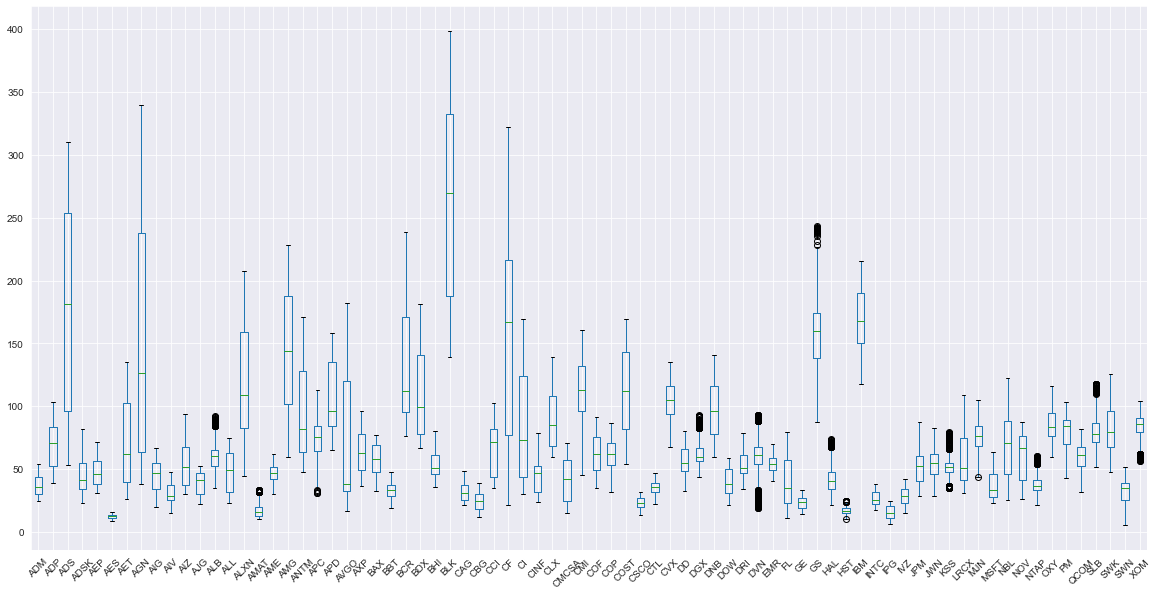

In [64]:
df_Lasso.boxplot(rot=45, fontsize=10, figsize=(20,10))

In [65]:
df_Lasso.insert(0, 'SP500', sp500)

df_Lasso.dropna(axis=0, inplace=True)

df_Lasso

<ipython-input-65-34c7defe6205>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lasso.dropna(axis=0, inplace=True)


,SP500,ADM,ADP,ADS,ADSK,AEP,AES,AET,AGN,AIG,AIV,AIZ,AJG,ALB,ALL,ALXN,AMAT,AME,AMG,ANTM,APC,APD,AVGO,AXP,BAX,BBT,BCR,BDX,BHI,BLK,CAG,CBG,CCI,CF,CI,CINF,CLX,CMCSA,CMI,COF,COP,COST,CSCO,CTL,CVX,DD,DGX,DNB,DOW,DRI,DVN,EMR,FL,GE,GS,HAL,HST,IBM,INTC,IPG,IVZ,JPM,JWN,KSS,LRCX,MJN,MSFT,NBL,NOV,NTAP,OXY,PM,QCOM,SLB,SWK,SWN,XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1132.99,31.469999,42.830002,65.889999,25.670000,34.939999,13.67,33.000000,40.290001,29.889999,15.960000,30.160000,22.330000,38.090000,30.410000,48.250000,14.300000,38.600000,68.879997,59.750000,64.739998,83.160000,18.860001,40.919998,58.289998,25.809999,78.680000,78.599998,41.240002,238.580002,23.110000,13.820000,39.610001,91.840000,36.369999,26.500000,61.430000,16.969999,46.939999,39.049999,52.579958,59.410000,24.690001,36.660000,79.059998,34.260001,61.160000,83.370003,29.180000,35.000000,76.570000,43.349998,11.160000,15.450000,173.080002,31.250000,11.820000,132.449997,20.879999,7.530000,23.340000,42.849998,37.919998,53.980000,39.880001,44.990002,30.950001,73.220001,46.089994,34.189999,83.100005,49.349998,46.939999,67.110001,52.709999,50.830002,69.150002
2010-01-05,1136.52,31.639999,42.600003,66.019997,25.280001,34.540001,13.53,32.529999,39.889999,29.330000,16.360001,31.059999,22.209999,38.020000,30.910000,47.560001,14.190000,38.430000,69.430000,60.400002,66.559998,82.470000,19.000000,40.830002,57.889997,26.180000,79.349998,77.870003,43.660000,239.610001,23.209998,14.150000,39.990002,93.330002,36.980000,26.510000,62.099998,16.740000,48.049999,40.590000,52.629959,59.230000,24.580000,36.720001,79.620003,33.929998,59.790001,83.290001,30.480000,34.849998,76.650002,43.419998,11.470000,15.530000,176.139999,31.650000,12.090000,130.850006,20.870001,7.450000,23.469999,43.680000,37.330002,54.020000,39.610001,44.610001,30.959999,75.120003,46.889994,33.590000,82.500008,48.919998,48.070000,67.300003,53.480000,51.650002,69.419998
2010-01-06,1137.14,31.559999,42.500004,66.349998,25.340000,34.889999,13.39,32.400002,40.020000,29.139999,16.650000,30.969999,22.219999,38.090000,30.920000,47.680000,14.160000,38.470001,70.790001,61.380001,67.139999,81.789996,19.150000,41.490002,58.089998,26.580000,79.010002,77.660004,45.840000,234.669998,23.129999,14.030000,39.419998,97.220001,36.900002,26.570000,61.939999,16.620001,48.490002,40.810001,53.009959,60.000000,24.420000,35.279999,79.629997,34.040000,58.869999,83.339996,31.020000,34.389999,76.419998,43.810001,11.910000,15.450000,174.259995,32.400002,12.160000,130.000000,20.799999,7.450000,22.980000,43.919998,37.430000,54.720001,39.430000,45.259998,30.770000,75.830002,47.559995,33.349998,83.490008,48.919998,47.599998,68.800003,54.820000,51.400002,70.019997
2010-01-07,1141.69,31.230000,42.480000,66.959999,25.480000,35.189999,13.40,33.430000,39.700001,28.580000,17.260000,31.350000,22.080000,37.820000,31.080000,47.860001,14.010000,38.569998,70.470001,63.660000,67.029999,81.319994,19.030001,41.980000,59.029997,27.650000,80.129997,77.639999,46.169998,237.250000,23.199998,14.170000,38.770000,96.239996,38.259998,26.670000,61.349998,16.969999,50.950001,42.830002,52.799957,59.709999,24.530001,34.939999,79.330002,34.389999,59.439999,82.599998,31.040001,34.709999,75.970001,43.810001,11.820000,16.250000,177.669998,32.480000,12.610000,129.550003,20.600000,7.260000,23.049999,44.790001,38.930000,53.459999,39.360001,45.959999,30.450001,74.809998,47.099996,33.270000,82.870001,49.529999,48.980000,69.510002,56.750000,50.950001,69.800003
2010-01-08,1144.98,30.840000,42.420001,67.680000,26.260000,35.610001,13.78,32.700001,39.410000,29.340000,16.860001,31.370001,22.139999,38.389999,31.209999,47.950001,14.550000,39.320000,69.820000,63.939999,67.059998,81.840000,19.170000,41.950001,59.169997,27.340000,80.510002,77.910004,47.099998,238.919998,23.019999,14.200000,38.959999,98.310003,37.970001,26.580000,61.360001,16.920000,53.669998,42.459999,53.259958,59.279999,24.660000,34.840000,79.470001,33.940000,59.439999,81.739998,31.15

In [66]:

X_trainLasso, X_testLasso, y_trainLasso, y_testLasso = split_df(df_Lasso)

In [67]:
model.fit(X_trainLasso, y_trainLasso)

LinearRegression()

In [68]:
y_predictLasso = model.predict(X_testLasso)

MSLE_LS = mean_squared_log_error(y_test, y_predictLasso)

MAE_LS = mean_absolute_error(y_test, y_predictLasso)

print(f'mean_absolute_error: {MAE_LS}  mean_squared_log_error: {MSLE_LS}')

mean_absolute_error: 65.77144980826381  mean_squared_log_error: 0.0013783018238595053


### Comparación de métricas

<ipython-input-69-451336a3c580>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


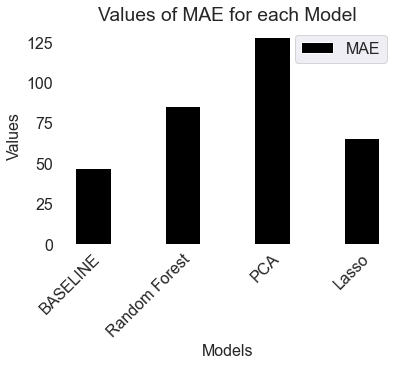

In [69]:
X = ['BASELINE','Random Forest','PCA','Lasso']
MAE = [MAE_BL,MAE_RR,MAE_PCA,MAE_LS]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, MAE, 0.4, label = 'MAE', color = ['black'])

ax = plt.axes()
ax.set_facecolor("white")
  
plt.xticks(X_axis, X, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Values of MAE for each Model")
plt.legend()
plt.show()

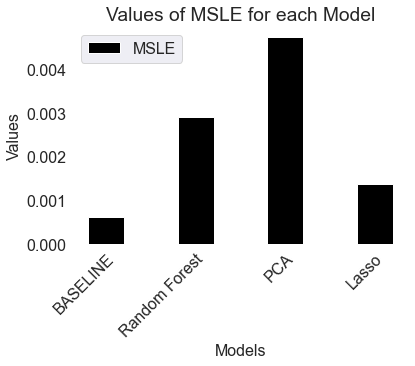

In [70]:
X = ['BASELINE','Random Forest','PCA','Lasso']

MSLE = [MSLE_BL,MSLE_RR,MSLE_PCA,MSLE_LS]
  
X_axis = np.arange(len(X))

ax = plt.axes()
ax.set_facecolor("white")

plt.bar(X_axis, MSLE, 0.4, label = 'MSLE', color = 'black')
  
plt.xticks(X_axis, X, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Values of MSLE for each Model")
plt.legend()
plt.show()

Se observa que el mismo modelo para diferentes conjuntos obtenidos mediante reducción de características mejora o empeora en función del número de variables reducidas. Como se observa, PCA es la que peor resultado obtiene, siendo la selección obtenida mediante importancia de características utilizando un RandomForrest la que mejor resultado obtiene en relación Cant. Variables/Métricas. Esto demuestra que mediante una correcta selección de metodos de reducción se pueden obtener buenos resultados.  